In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_og = pd.read_csv('../data/raw/card_transdata.csv')
df = df_og.copy()
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [15]:
fraud = df[df['fraud'] == 1]
no_fraud = df[df['fraud'] == 0]

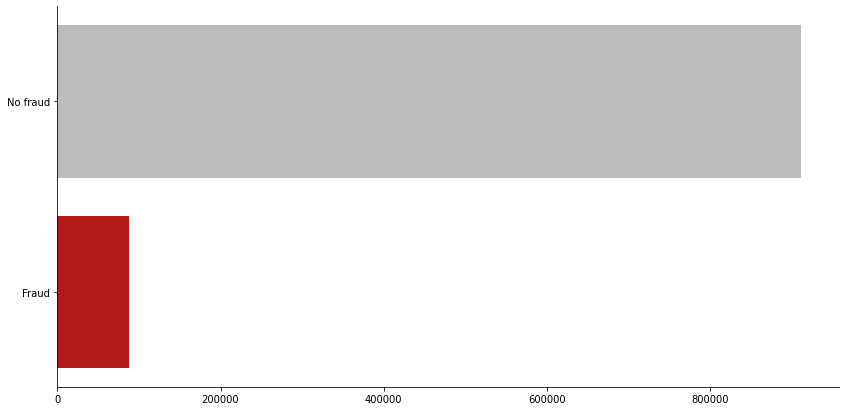

In [35]:
plt.figure(figsize=(14,7))
ax = sns.countplot(data=df, y='fraud', orient='h', palette=['#bdbbbd', '#cc0000'])
plt.ylabel(None)
plt.xlabel(None)
ax.set_yticklabels(['No fraud', 'Fraud'])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)



In [42]:
print(f'O dataset está desbalanceado.\nNão fraude: {no_fraud.shape[0]} registros, {len(no_fraud)/len(df)*100:.2f}% do dataset.\
    \nFraude: {fraud.shape[0]} registros, {len(fraud)/len(df)*100:.2f}% do dataset.')

O dataset está desbalanceado.
Não fraude: 912597 registros, 91.26% do dataset.    
Fraude: 87403 registros, 8.74% do dataset.


In [60]:
fraud_means = fraud.describe().iloc[1][:-1]
no_fraud_means = no_fraud.describe().iloc[1][:-1]

In [61]:
fraud_means

distance_from_home                66.261876
distance_from_last_transaction    12.712185
ratio_to_median_purchase_price     6.006323
repeat_retailer                    0.880119
used_chip                          0.256399
used_pin_number                    0.003123
online_order                       0.946318
Name: mean, dtype: float64

In [136]:
data_plot = pd.DataFrame([no_fraud_means, fraud_means], index=['no_fraud', 'fraud']).T
data_plot = data_plot.sort_values('fraud', ascending=False)
data_plot

,no_fraud,fraud
distance_from_home,22.832976,66.261876
distance_from_last_transaction,4.301391,12.712185
ratio_to_median_purchase_price,1.423642,6.006323
online_order,0.622225,0.946318
repeat_retailer,0.881672,0.880119
used_chip,0.359402,0.256399
used_pin_number,0.109944,0.003123


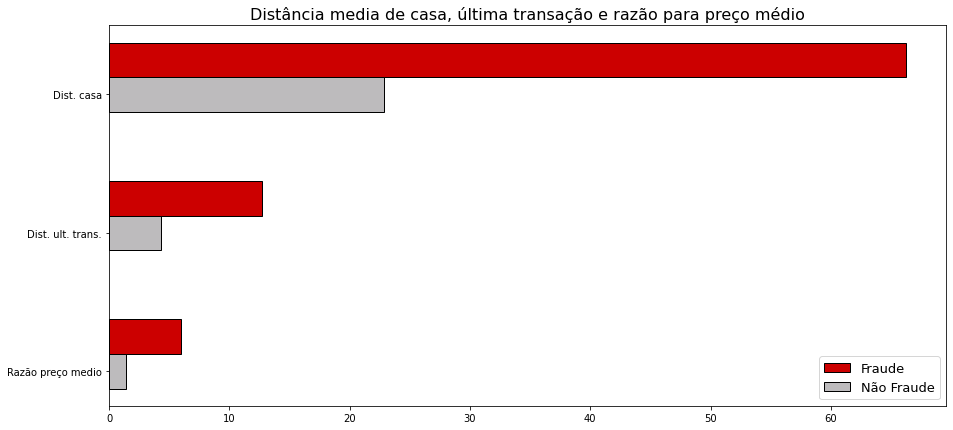

In [152]:
r = np.arange(3)
width=0.25

plt.figure(figsize=(15,7))
plt.barh(r, data_plot['fraud'][0:3], color='#cc0000', height=width, edgecolor='black', label='Fraude')
plt.barh(r+width, data_plot['no_fraud'][0:3], color='#bdbbbd', height=width, edgecolor='black', label='Não Fraude', tick_label=['Dist. casa', 'Dist. ult. trans.', 'Razão preço medio'])

plt.title('Distância media de casa, última transação e razão para preço médio', {'fontsize': 16})
plt.legend(prop={'size': 13})
plt.gca().invert_yaxis()


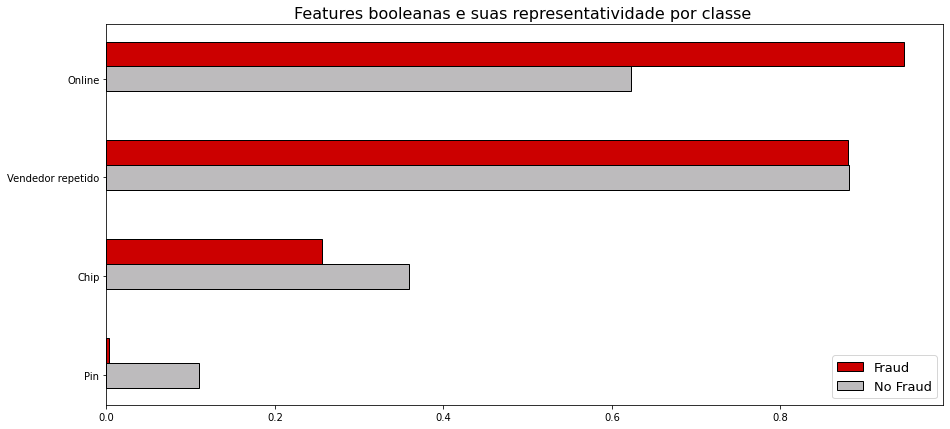

In [153]:
r = np.arange(4)
width=0.25

plt.figure(figsize=(15,7))
plt.barh(r, data_plot['fraud'][3:7], color='#cc0000', height=width, edgecolor='black', label='Fraud')
plt.barh(r+width, data_plot['no_fraud'][3:7], color='#bdbbbd', height=width, edgecolor='black', label='No Fraud', tick_label=['Online', 'Vendedor repetido', 'Chip', 'Pin'])
plt.title('Features booleanas e suas representatividade por classe ', {'fontsize': 16})
plt.legend(prop={'size': 13})
plt.gca().invert_yaxis()

In [156]:
data_plot = df
data_plot

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

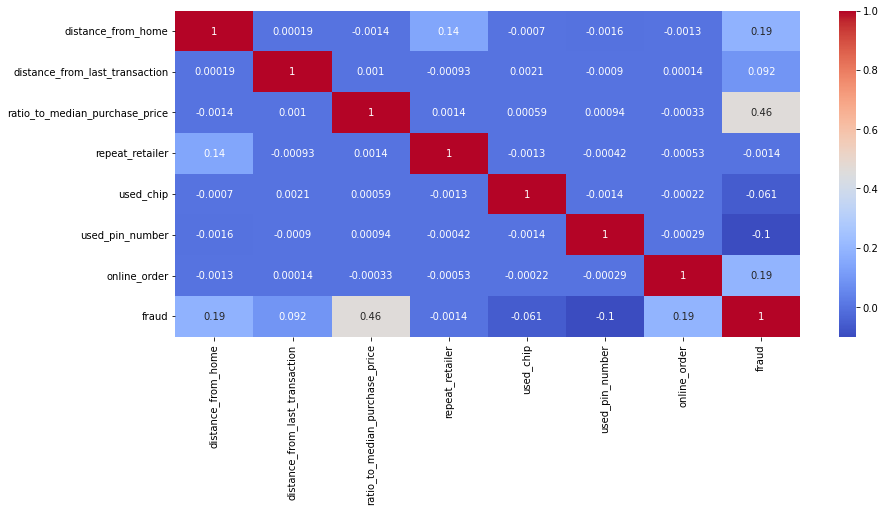

In [167]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

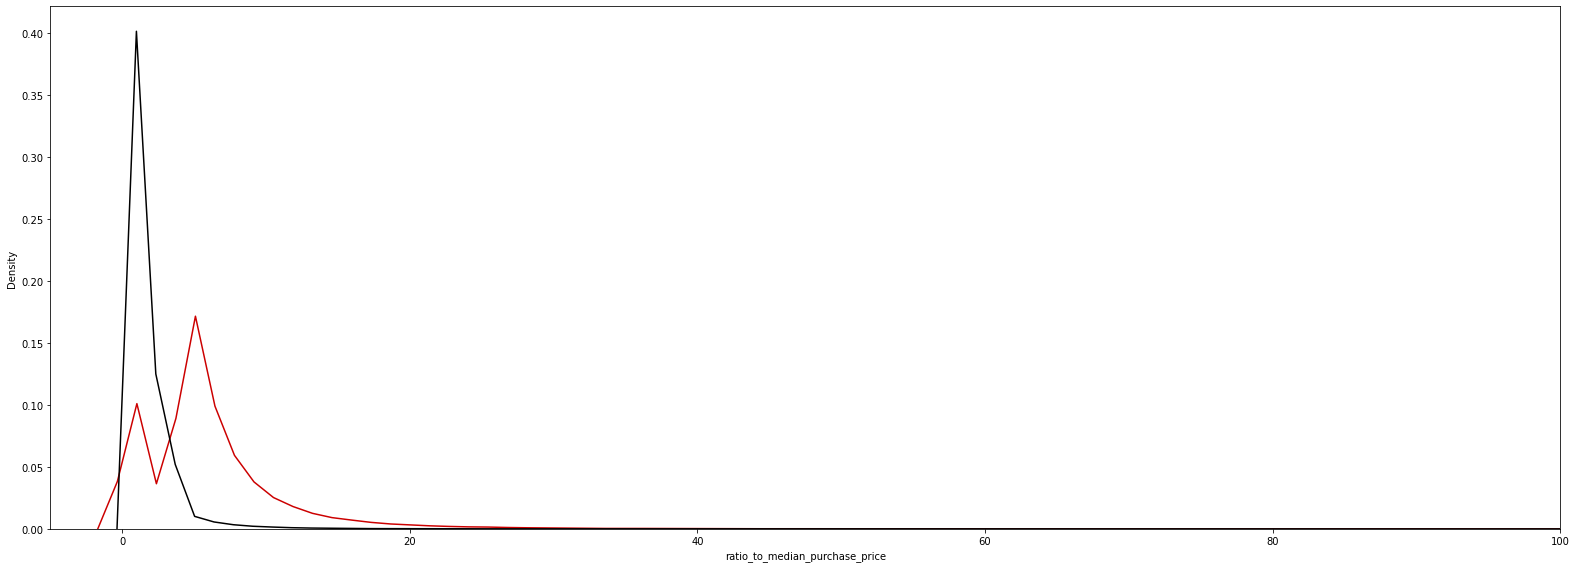

In [179]:
plt.figure(figsize=(22, 8))
sns.kdeplot(data=fraud, x='ratio_to_median_purchase_price', color='#cc0000')
sns.kdeplot(data=no_fraud, x='ratio_to_median_purchase_price', color='black')
plt.xlim(-5, 100)
plt.tight_layout()